# ASSIGNMENT 5 : EXPLORATORY DATA ANALYSIS

In [5]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###  1. Data Cleaning and Preparation:

*	Load the dataset into a DataFrame or equivalent data structure.
*	Handle missing values appropriately (e.g., imputation, deletion).
*	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
*	Detect and treat outliers if necessary.


In [8]:
#loading the dataset
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\5. EDA1\Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [9]:
df.shape

(2126, 14)

We can see there is a total of 2126 records and 14 columns.

In [11]:
# Handle missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [15]:
print("Shape of dataset before removing null values : ",df.shape)
df.dropna(inplace=True)
print("Shape of dataset after removing null values : ",df.shape)

Shape of dataset before removing null values :  (2126, 14)
Shape of dataset after removing null values :  (2105, 14)


Luckily we had null values only on those 21 rows so it's better to just remove those null value rows.

Alternatively we could fill the null values with mean or any other likely parameter but since the data is about patients one should fill those data points with the help and advise of any health professional so it's better to just drop them since the dropped data points didn't cause any major changes in the dataset's size.

In [18]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


Here we can notice that all the columns are in their respective data type so we don't need to change any column's data type. Therefore we can say the columns are consistent.

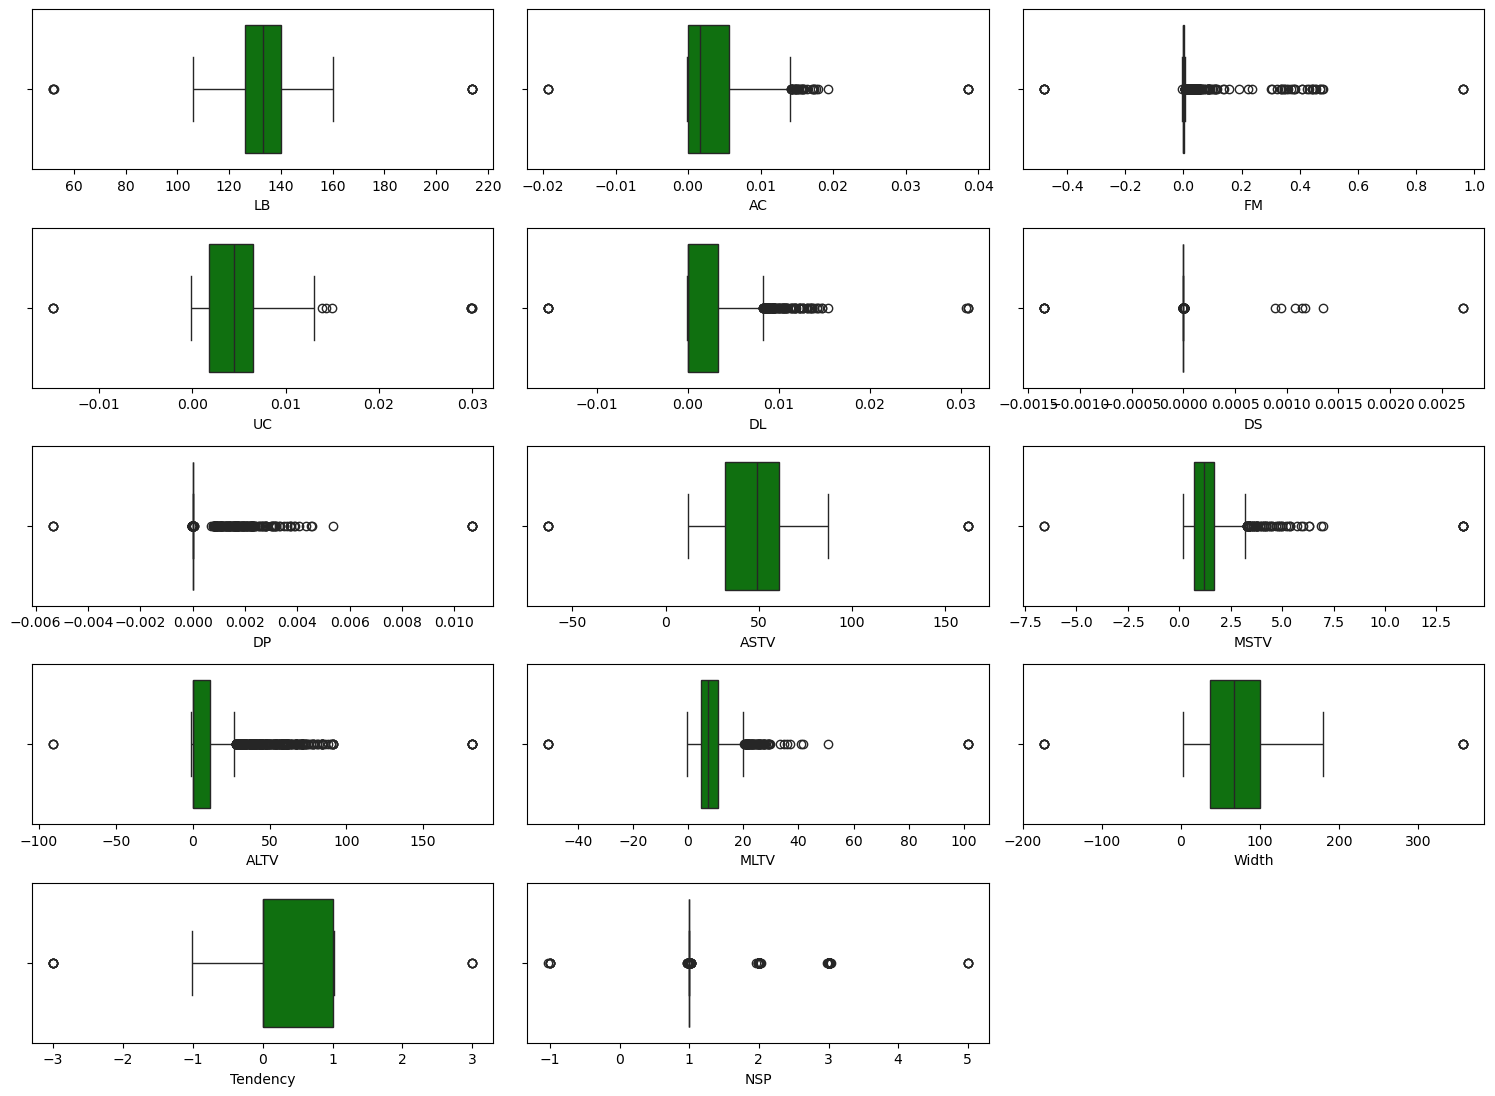

In [23]:
# Detect and treat outliers if necessary.

df_cols = df.columns                              # defining list of columns
plt.figure(figsize=(15,15))                       # plotting figure size
index= 1                                             
for col in df_cols:                               # going through each columns
    plt.subplot(7, 3, index)                      # subplot formation
    sns.boxplot(x=df[col], color='green')       # plotting box plot for each column
    index += 1                                    # increasing index for each plot
plt.tight_layout()                                # to avoid overlapping
plt.show()                                          

In [25]:
import matplotlib.pyplot as plt

# Function to identify outliers using the IQR method
def detect_outliers(column):                                                   #function definition takes columns as input
    Q1 = df[column].quantile(0.25)                                             # defining 25% of the column values
    Q3 = df[column].quantile(0.75)                                             # defiining 75% of the column values
    IQR = Q3 - Q1                                                              # Defining Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR                                               # Finding lower bound
    upper_bound = Q3 + 1.5 * IQR                                               # Finding upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]     # identifying outlier i.e data points below lower_bound and data points above upper_bound
    return outliers                                                            # return those points only

# Check for outliers in each column and summarize
outlier_summary = {}                                      # dictionary to hold the number of outlier in each column
for column in df.columns:                                 # running the loop through all the columns in DataFrame
    outliers = detect_outliers(column)                    # Calling the function
    outlier_summary[column] = len(outliers)               # updating dictionary

# Display the outlier counts for each column
outlier_summary


{'LB': 10,
 'AC': 39,
 'FM': 343,
 'UC': 13,
 'DL': 124,
 'DS': 120,
 'DP': 284,
 'ASTV': 10,
 'MSTV': 78,
 'ALTV': 317,
 'MLTV': 81,
 'Width': 10,
 'Tendency': 10,
 'NSP': 559}

Here we can see the summary of the outliers in each columns.
* few columns like NSP, FM, ALTV, DP has a lot of outliers.
* we have a lot of outlier and we'll be removing them.

In [28]:
def remove_outliers(df, column):                  #function to remove outliers
    Q1 = df[column].quantile(0.25)                #defining Q1 
    Q3 = df[column].quantile(0.75)                #defining Q3
    IQR = Q3 - Q1                                 #defining IQR
    lower_bound = Q1 - 1.5 * IQR                  #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR                  #calculating upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]    #returning all the rows with greater than lower bound and lesser than upper bound

print("Dataset size before removing outliers: ", df.shape)
for col in df.columns:
    df = remove_outliers(df, col)                 # calling the function
print("Dataset size after removing outliers: ", df.shape)

Dataset size before removing outliers:  (2105, 14)
Dataset size after removing outliers:  (904, 14)


### 2.	Statistical Summary:

In [31]:
df_stats =pd.DataFrame(df.describe().T)                  #converting described information of a data set into Data Frame
df_stats['median']=df.median()                           #adding 'median' column containing median value of each column
df_stats['IQR'] = df_stats['75%'] - df_stats['25%']      #adding another column as 'IQR'
df_stats

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,904.0,132.186337,9.379489,106.000000,125.000000,133.000000,139.000000,160.000000,133.000000,14.000000
AC,904.0,0.003928,0.003754,-0.000122,0.000000,0.003060,0.006595,0.014068,0.003060,0.006595
FM,904.0,0.000581,0.001296,-0.002076,0.000000,0.000000,0.000149,0.006105,0.000000,0.000149
UC,904.0,0.004896,0.002689,-0.000101,0.003103,0.004986,0.006839,0.012072,0.004986,0.003736
DL,904.0,0.001520,0.002255,-0.000124,0.000000,0.000000,0.002752,0.008403,0.000000,0.002752
DS,904.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,904.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,904.0,42.851032,15.145345,15.000000,29.000000,42.000000,56.000000,81.000000,42.000000,27.000000
MSTV,904.0,1.220650,0.500114,0.200000,0.800000,1.200000,1.500000,2.700000,1.200000,0.700000
ALTV,904.0,4.375244,8.289906,-0.899870,0.000000,0.000000,5.000000,37.000000,0.000000,5.000000


1. LB (Baseline Fatal Heart Rate) : It has a very close mean and median value with a very low standard deviation suggest the central tendency is tightly clustered.
2. AC (Acceleraton) : this column is slightly skewed since the mean is slightly greater than the median value.
3. FM (Fatal Movement) : It's mean (0.00058) and median (0.000) suggests that the data points are concentrated around 0 and has very low standard variation(0.0013)
4. UC (Uterine Contractions) : It's mean (0.00490) and median (0.00499) sugests that this column is Slightly rightly skewed.
5. DL (Light Decelerations) : It's mean (0.00152) and median (0) also suggests that it is also highly concentrated around 0.
6. DS (Severe Decelerations) and DP (Prolonged Decelerations) : All parameters of this column is 0, which suggests there no severe prolonged decelerations.
7. ASTV (Abnormal Short-Term Variability) : It's mean (42.85) and median (42) which ranges from (15 to 81) suggests that the data shows substantial variability indicating abnormal short-term variations.
8. MSTV (Mean Short-Term Variability) : It's mean (1.22) and median (1.20) and a very small standard deviation.
9. ALTV (Abnormal Long-Term Variability) : It's mean (4.38), median (0), min has negative values and max his upto 37 suggests that the data might be highly skewed with a lot of variability.
10. MLTV (Mean Long-Term Variability) : It's mean (8.3), median (8.20) and standard deviation of 4.36 suggests greater variation compared to MSTV.
11. Width : Mean (65.71), Median (59) and standard deviation of 31.36 suggests a large variation in the column.
12. Tendency : Almost a binary-like distribution with small standard variation of 0.58
13. NSP (Normal/Pathological State) : All values are 1, indicating  uniformity in this column.

●	Highlight any interesting findings from this summary.

* The dataset contains significant variability in heart rate measures (LB, ASTV, MLTV) but shows consistency in variables like MSTV and UC.
* Several variables (e.g., FM, DL, DS, DP) are concentrated around 0, indicating limited activity or rare occurrences.
* Right-skewness in variables like ALTV and AC highlights rare but notable outliers.

### 3.	Data Visualization:
1. Create histograms or boxplots to visualize the distributions of various numerical variables.

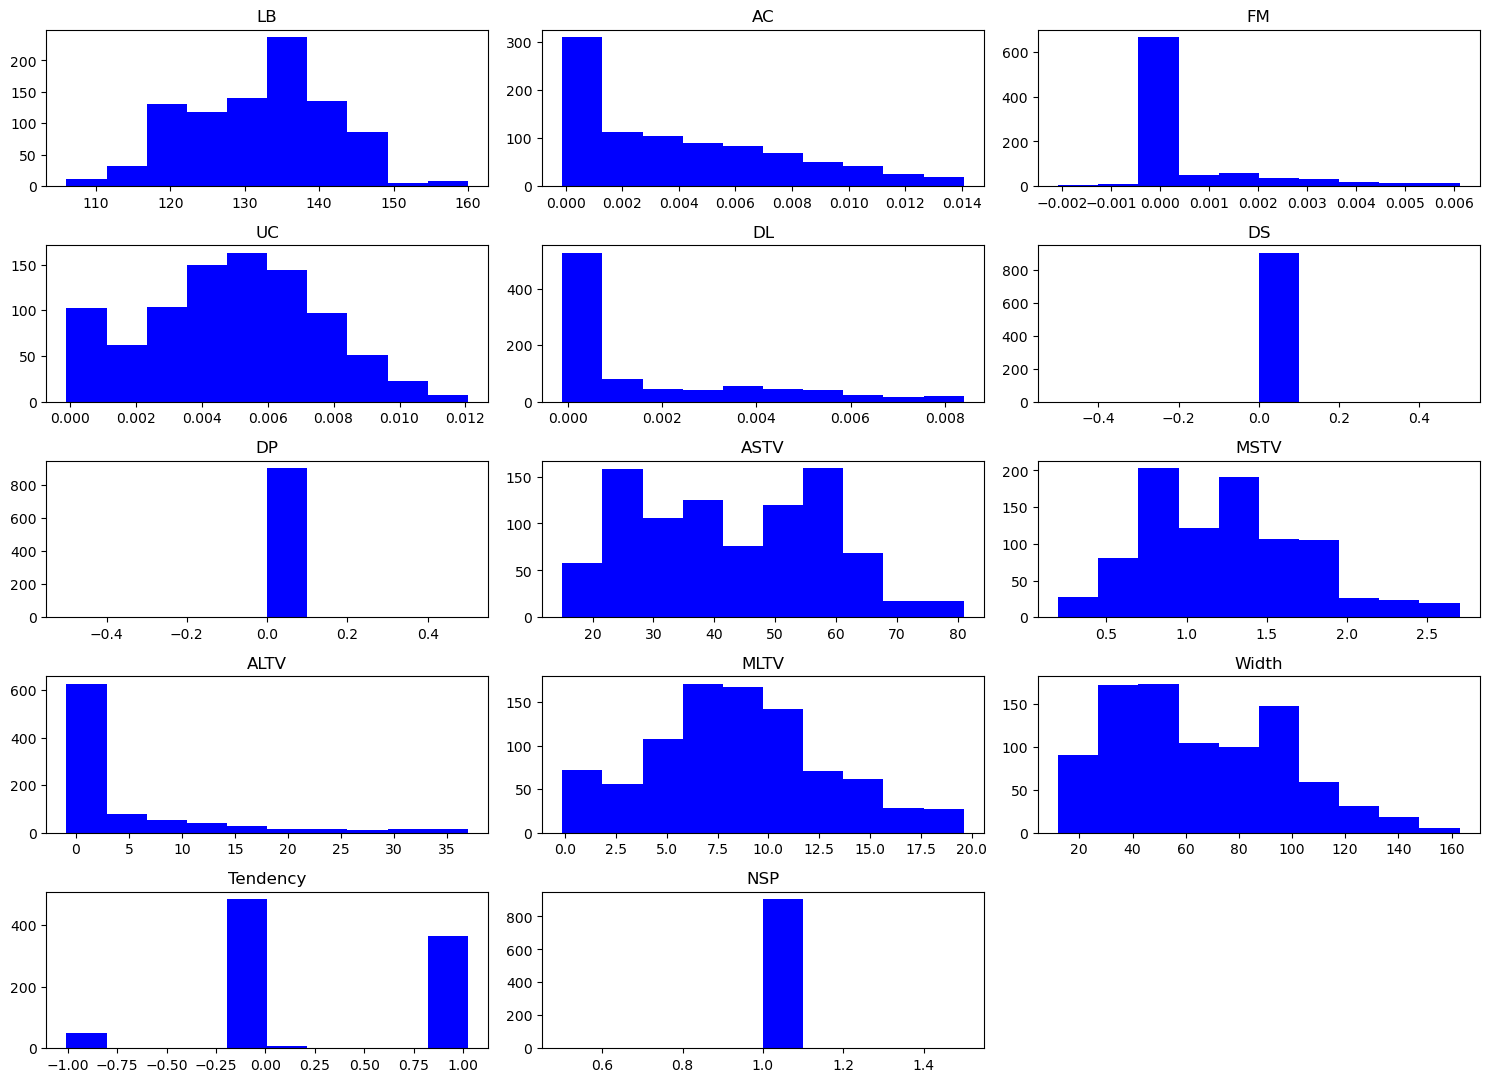

In [36]:
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(7, 3, index)       #creating subplot
    plt.hist(x=df[col], color='blue')            # creating hist plot inside each subplot
    plt.title(col)                 # setting up title as column name
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

2.	Use bar charts or pie charts to display the frequency of categories for categorical variables

We don't have any categorical column.

3.	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

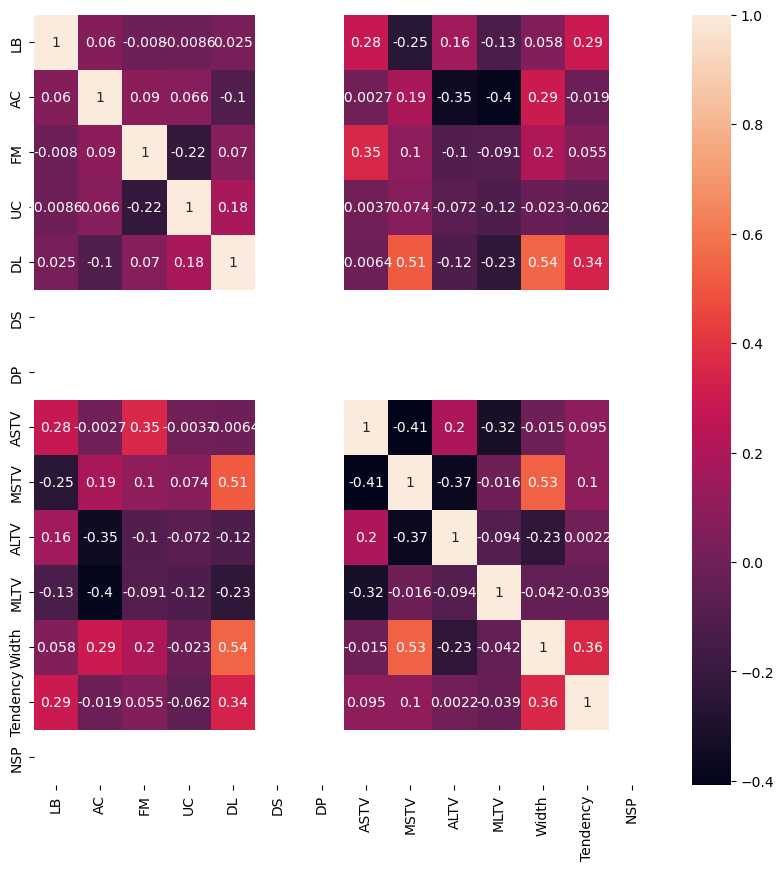

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cbar=True)        #ploting heatmap
plt.show()

* Many of the columns are posititvely and negatively correlated but none of them are highly correlated therefore it can be fed to Machine Learning Algoritm.

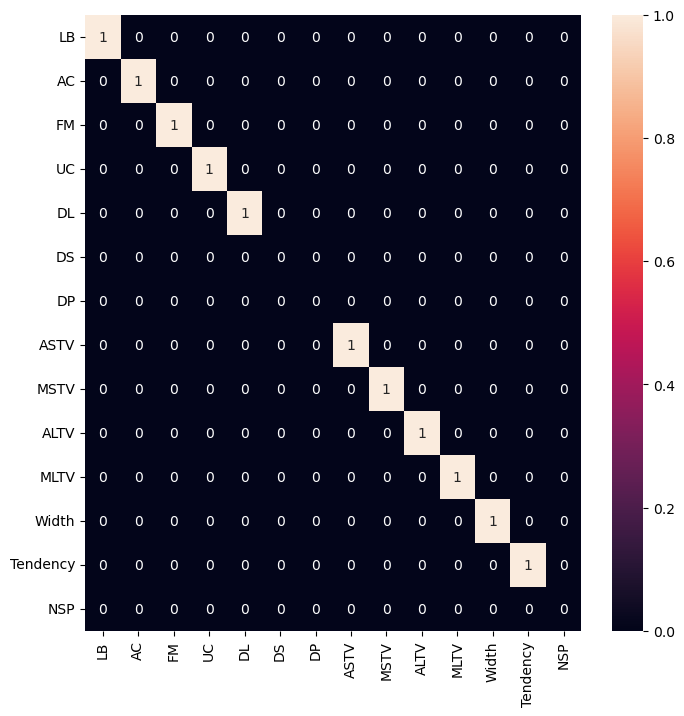

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()>0.8, annot=True, cbar=True)     #plotting binary heatmap
plt.show()

* With this heatmap it is clear that none of the columns have more than 0.8 correlativity, hence can be fed to ML algorithm.
* The columns which doesn't seem to display any value are concentrated at constant, They may mean something to the professionals so we need to consider that.

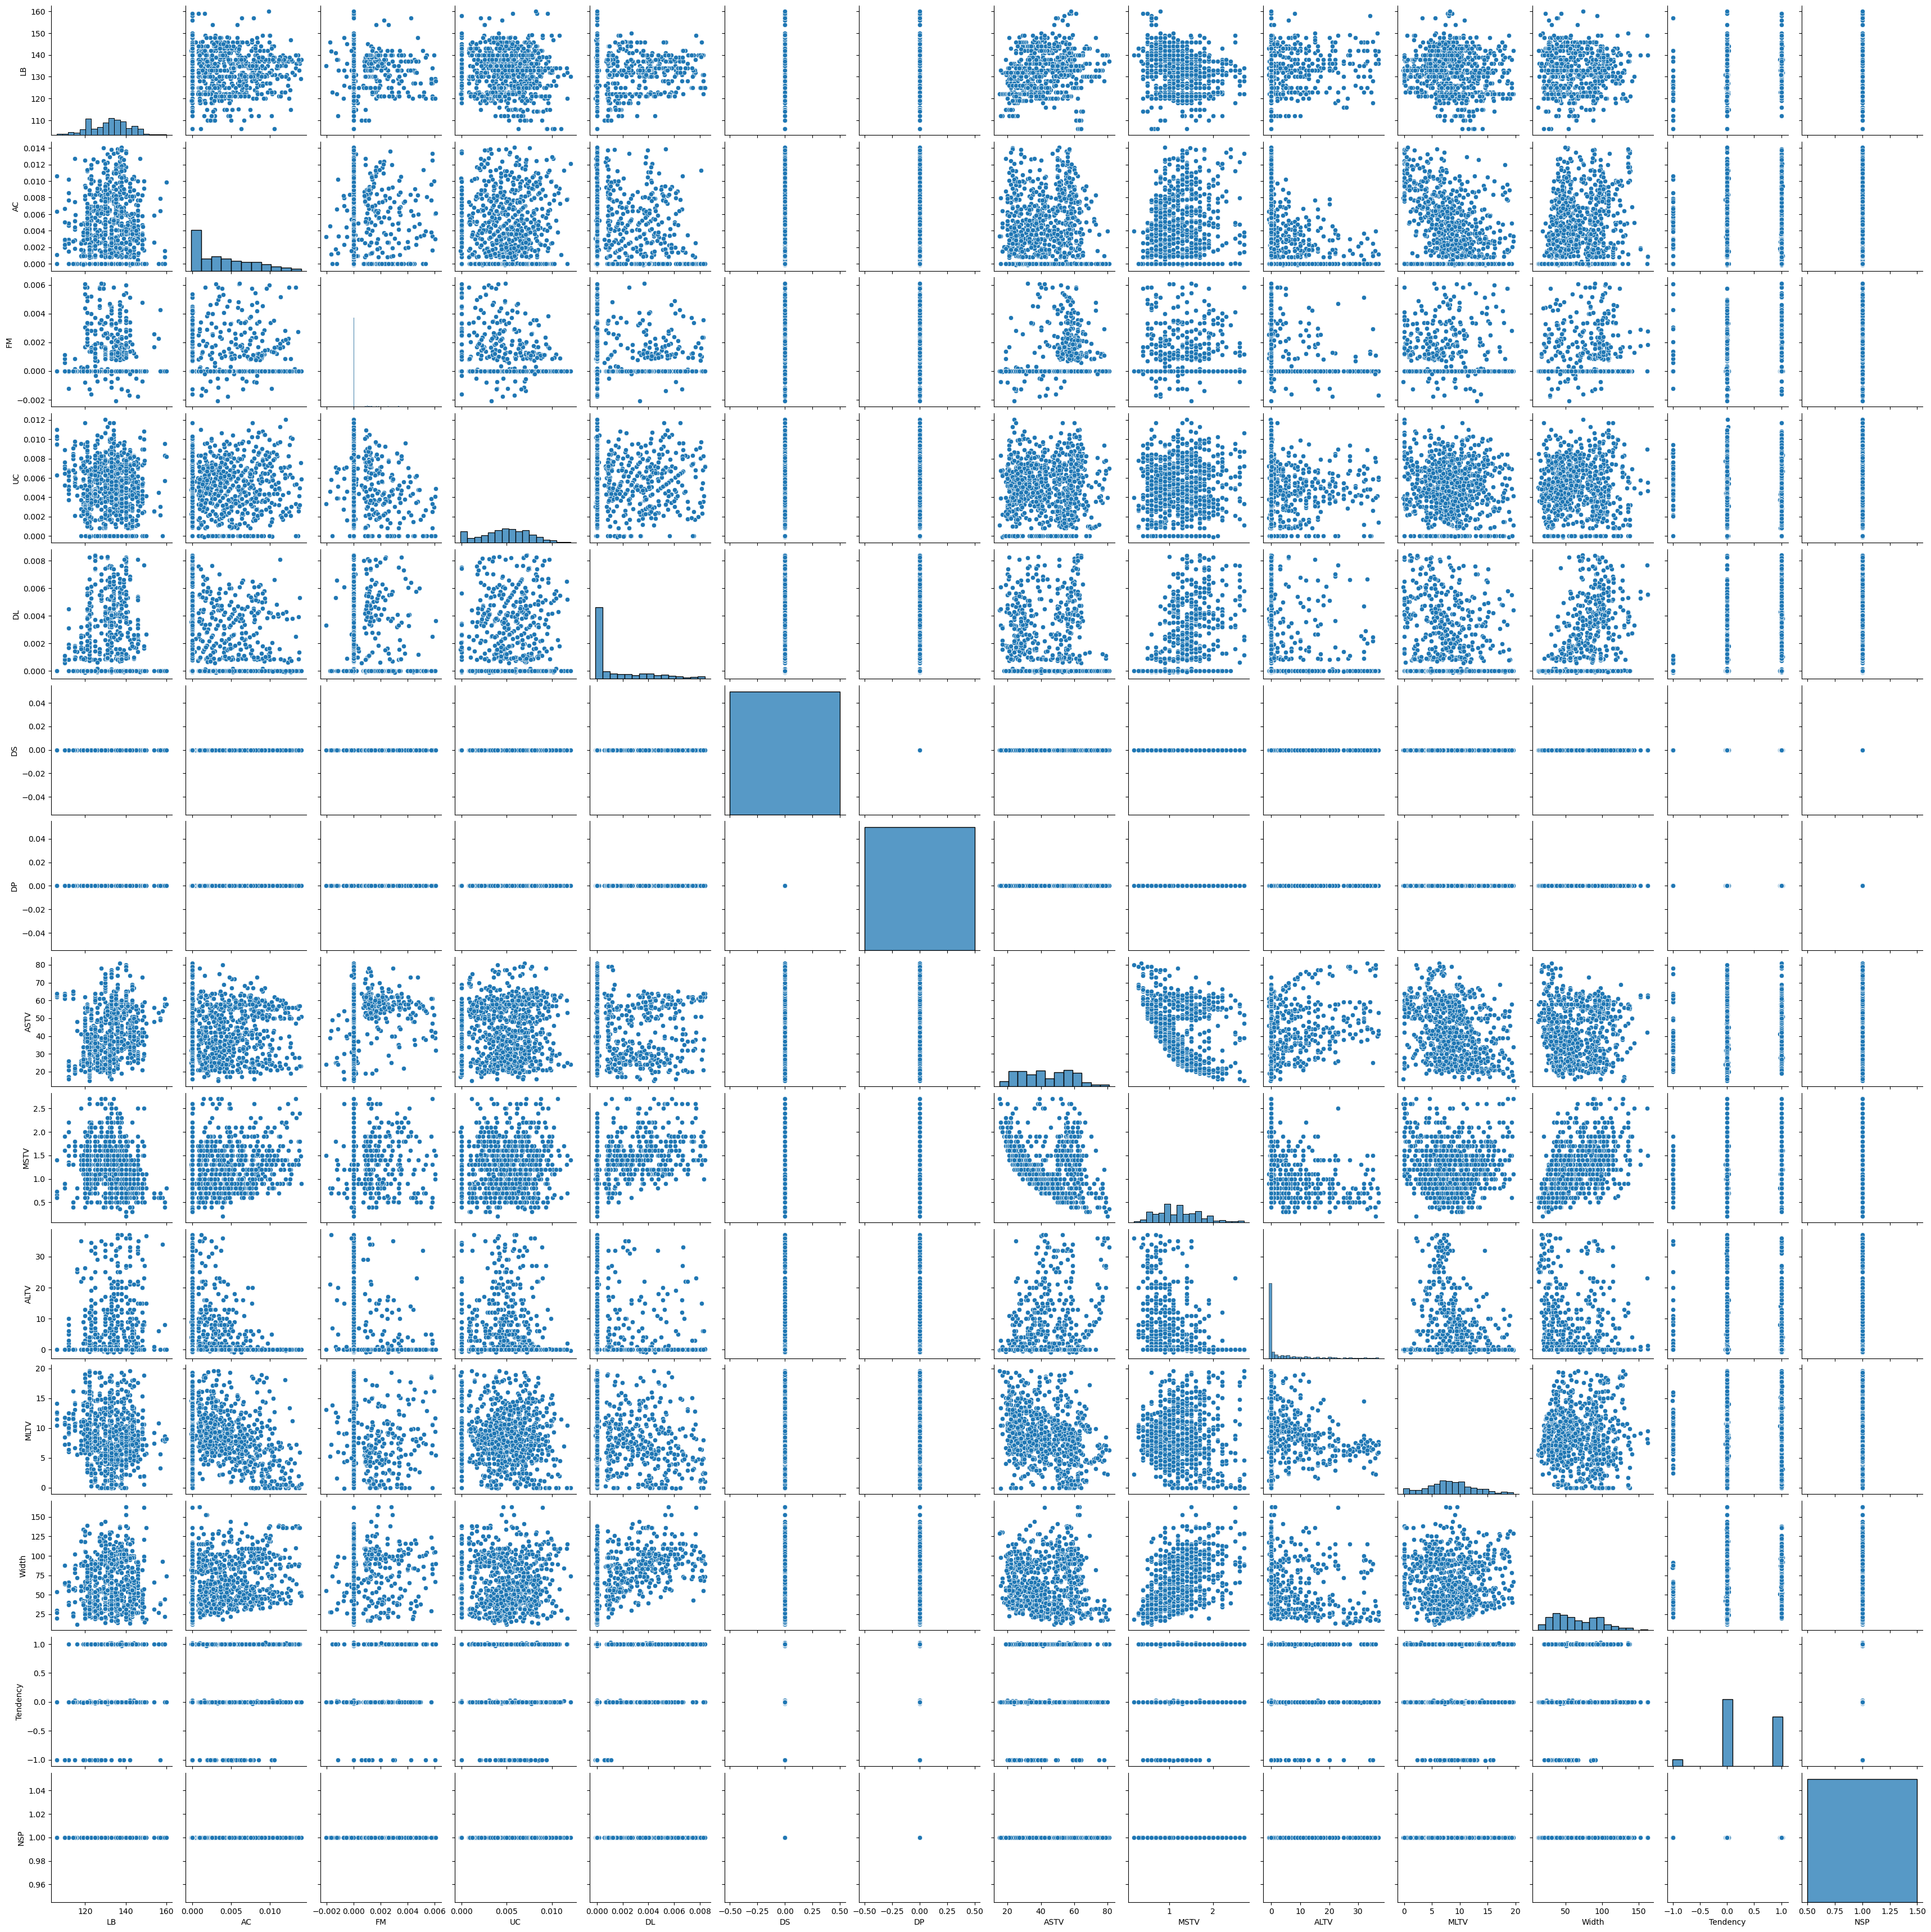

In [51]:
sns.pairplot(df)
plt.show()

### 4.	Pattern Recognition and Insights:
*	Identify any correlations between variables and discuss their potential implications.
*	Look for trends or patterns over time if temporal data is available.

1.  Columns like LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width are not so strongly correlated as we also infered that from the heatmap
2.  We can observe their distribution in the pairplot as they do not reveal any significant distribution of the data over the plane.
3.  Columns like DS,DP,Tendency,NSP barely has any distribution, their data points mostly lie in a fixed contant point indicating stangant distribution.
4.  LB against AC,FM,UC,DL,ALTV has slight vertical distribution of datapoints

### 5. Conclusion

* The dataset contained 2126 records with 14 columns related to cardiographic measurements and few colmns had missing values.
* We had many outliers in the dataset so we must analyze it further with the help of a professional heatcare person to make sure and know what those sudden spikes could mean and how it would harm or benifit a person in their health.
* Our dataset reduced drastically after removal of outliers, we might have lost a ton of meaningful out of bound information there, but in this case we have assumed those as outliers and treated them all.
* The dataset contains significant variability in heart rate measures (LB, ASTV, MLTV) but shows consistency in variables like MSTV and UC.
* 
* From hist plots we could see that
  * AC, FM, DL, MSTV, ALTV, Width are left skewed.
  * LB, UC, ASTV, MLTV, Tendency are a bit right skewed and few are balanced.
* From heatmap and pairplot we observed there were hardly any columns which are correlated.

* Recommendations for further analysis or actions based on the data.
1. Need further analysis on the outliers and what they mean.
2. Analyze Target variable again (NSP) potential class difference.
3. Need Dimentional Reduction since there are many redundancy highly correlated features.